
=== EEG Analysis Pipeline ===

[1/7] Loading data...


Loading healthy files:   0%|                                                                     | 0/5 [00:00<?, ?it/s]

Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']


Loading healthy files:  20%|████████████▏                                                | 1/5 [00:06<00:24,  6.06s/it]

Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']


Loading healthy files:  40%|████████████████████████▍                                    | 2/5 [00:11<00:16,  5.53s/it]

Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']


Loading healthy files:  60%|████████████████████████████████████▌                        | 3/5 [00:16<00:10,  5.44s/it]

Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']


Loading healthy files:  80%|████████████████████████████████████████████████▊            | 4/5 [00:21<00:05,  5.21s/it]

Used Annotations descriptions: ['Comment/actiCAP Data On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']


Loading healthy files: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:26<00:00,  5.36s/it]



Successfully loaded 5/5 files


Loading patient files: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.05it/s]



Successfully loaded 5/5 files
[2/7] Finding common channels...


  raw = mne.io.read_raw_brainvision(vhdr_path, preload=False, verbose=False)

Error loading F:/shivani/VSCode/ml/worked on dataset/3(final)/Healthy\sub-010020.vhdr: [Errno 2] No such file or directory: 'F:\\shivani\\VSCode\\ml\\worked on dataset\\3(final)\\Healthy\\Untitled.vmrk'


Error loading F:/shivani/VSCode/ml/worked on dataset/3(final)/Healthy\sub-010044.vhdr: [Errno 2] No such file or directory: 'F:\\shivani\\VSCode\\ml\\worked on dataset\\3(final)\\Healthy\\sub-010044eeg.vmrk'


Found 8 common channels
[3/7] Preprocessing data...
Creating RawArray with float64 data, n_channels=62, n_times=12704800
    Range : 0 ... 12704799 =      0.000 ...  5081.920 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 8251 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   20.0s


Not setting metadata
5081 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 5081 events and 2501 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=8, n_times=1738520
    Range : 0 ... 1738519 =      0.000 ... 17385.190 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
17385 matching events found
No baseline correction applied
0 projection items

C:\Users\shivani\AppData\Local\Programs\Python\Python312\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[4/7] Loading preprocessing artifacts...
✓ Scaler loaded successfully (expecting 992 features)
✓ Label encoder loaded successfully
[5/7] Applying transformations...
[6/7] Loading models...
✓ SVM model loaded successfully
✓ RF model loaded successfully
✓ XGB model loaded successfully
[7/7] Evaluating models...

=== Generating Visualizations ===

Generating EEG Comparison visualization...


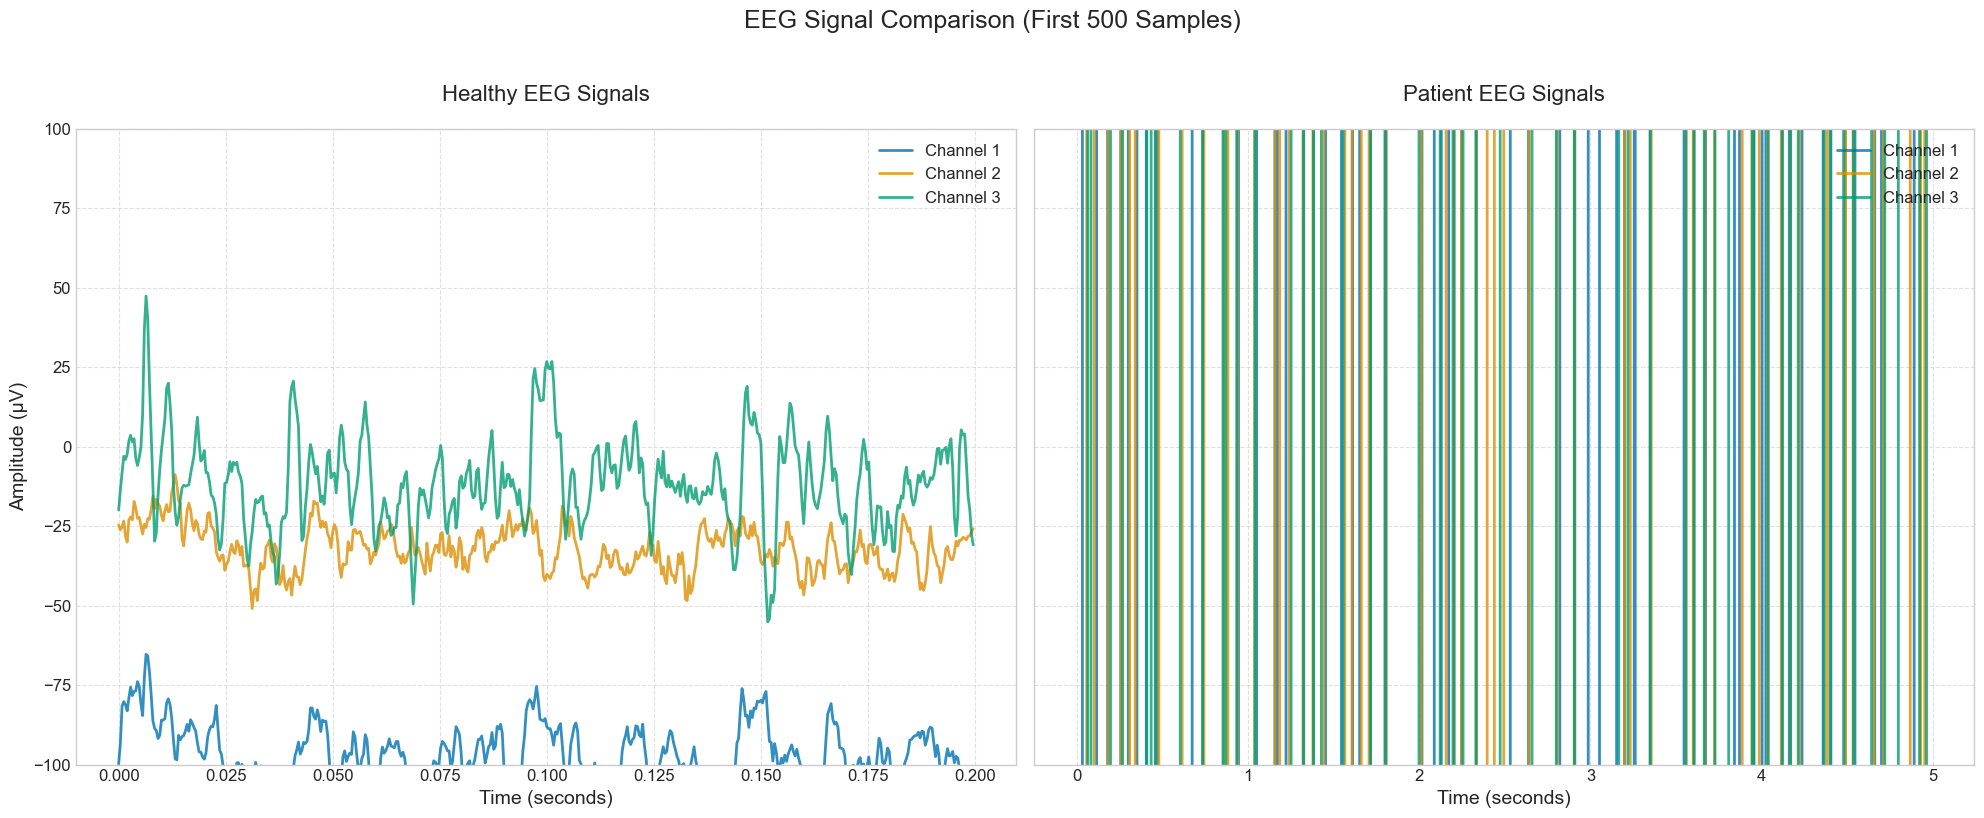

Generating Patient Response visualization...


C:\Users\shivani\AppData\Local\Temp\ipykernel_18980\2064563183.py:534: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


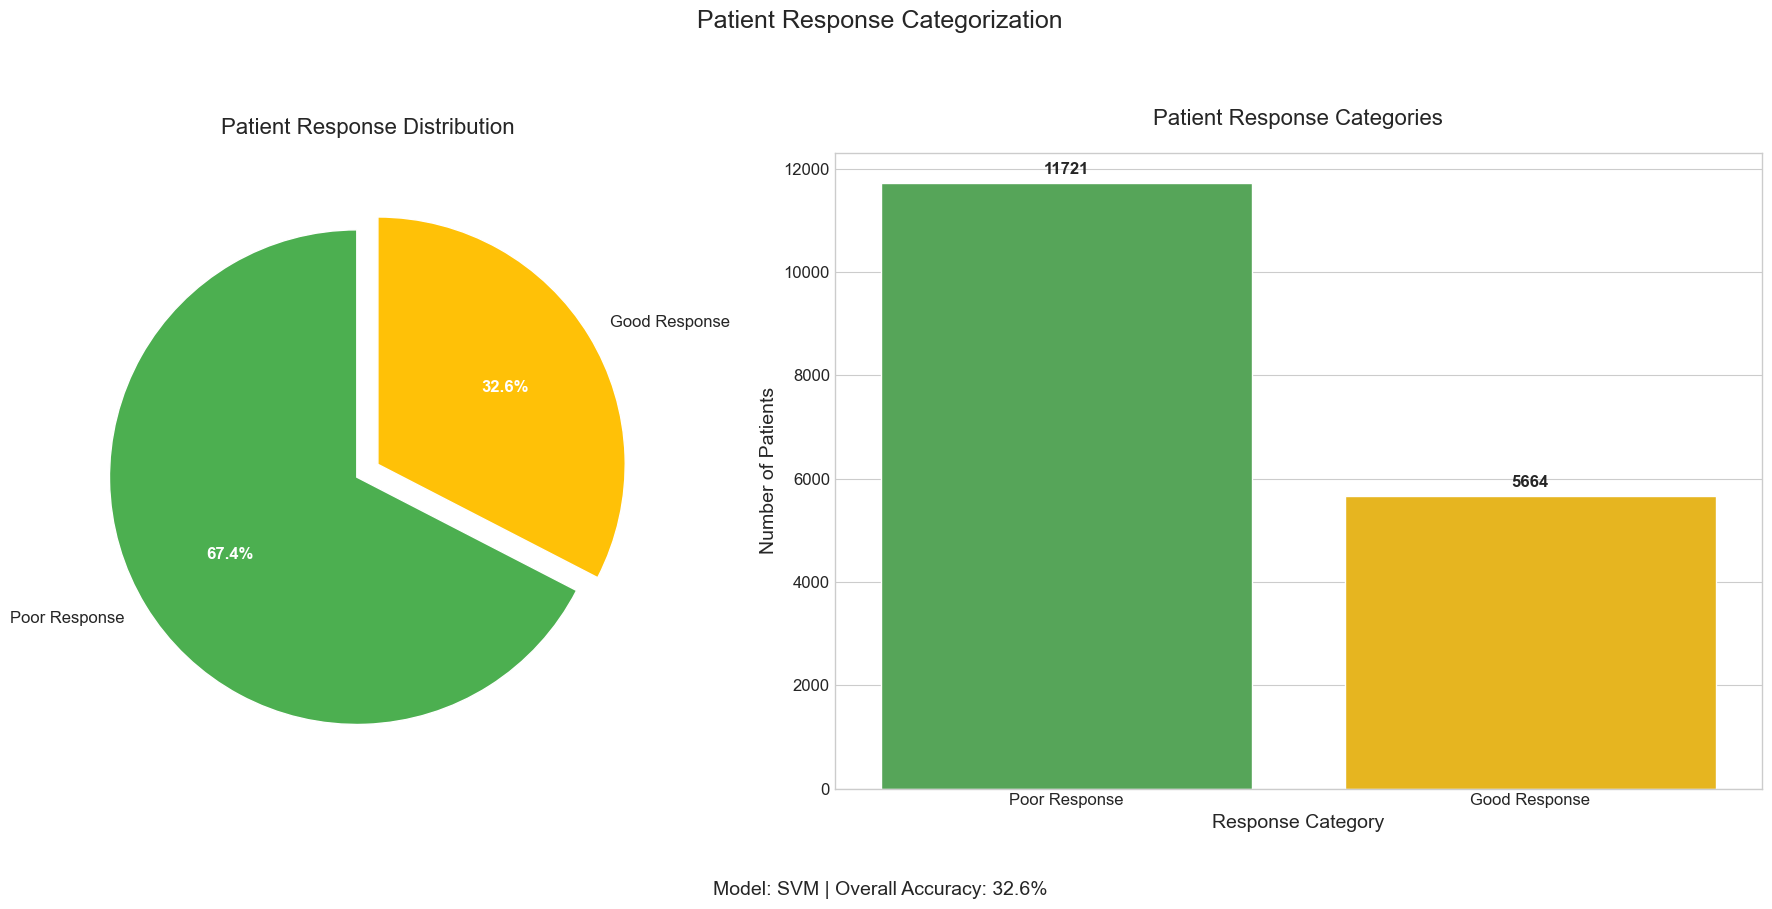

Generating Confusion Matrix visualization...


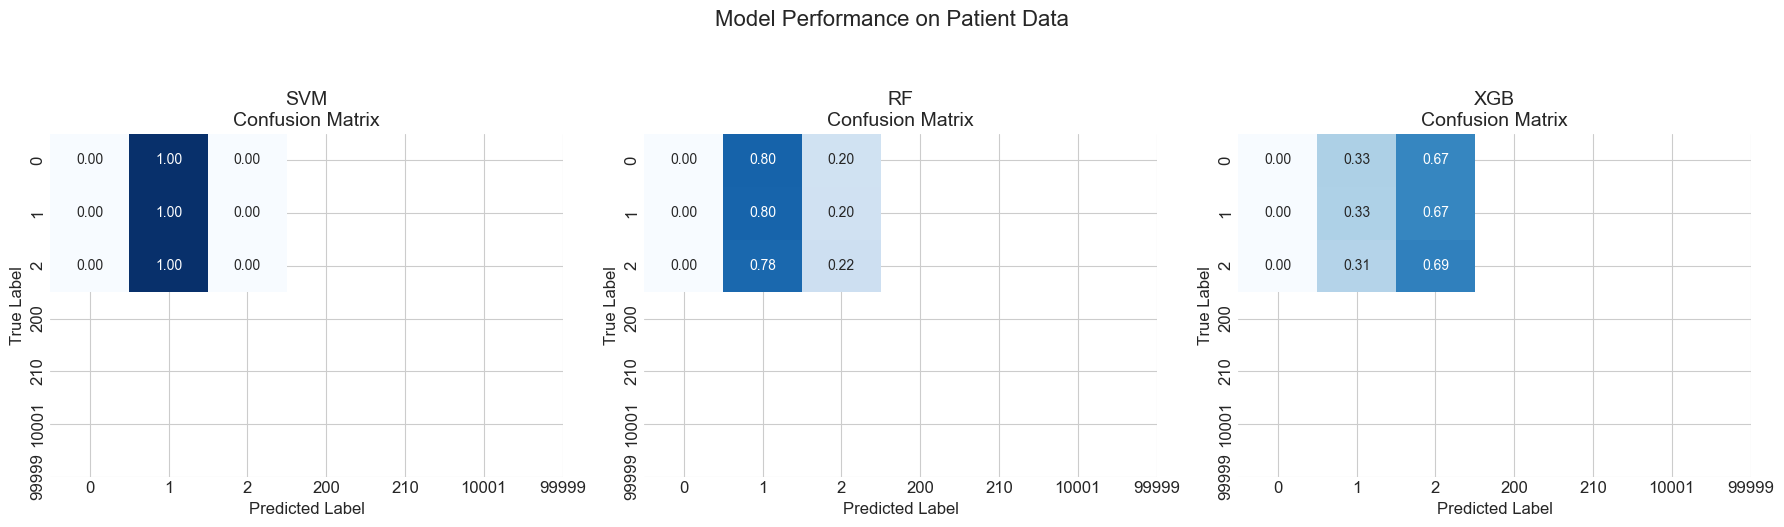

Generating Model Performance visualization...


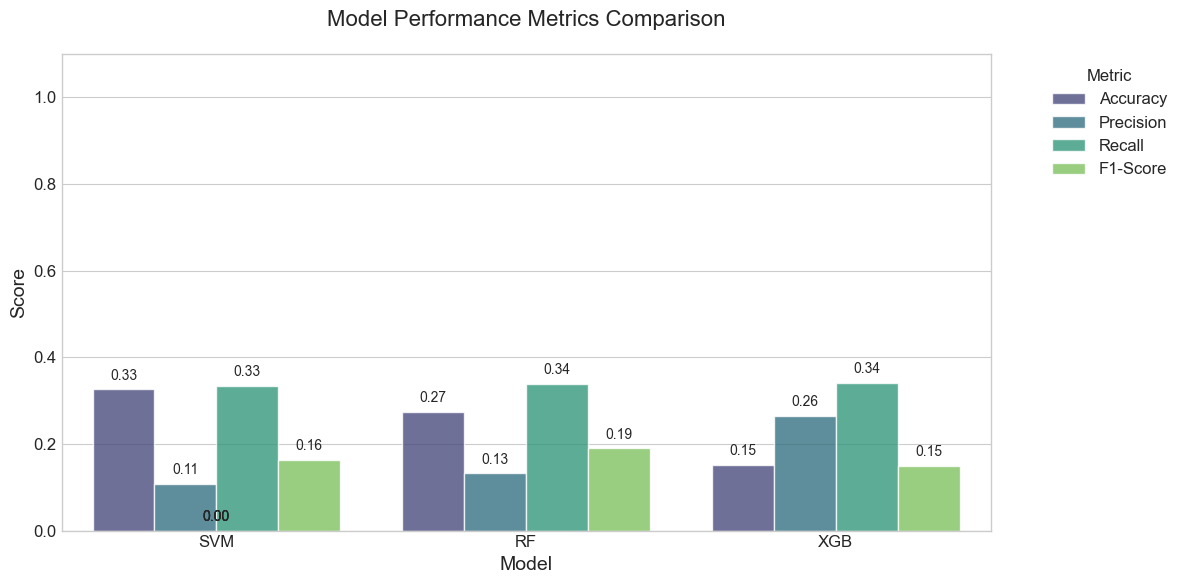

Generating ROC Curve visualization...


C:\Users\shivani\AppData\Local\Temp\ipykernel_18980\2064563183.py:665: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


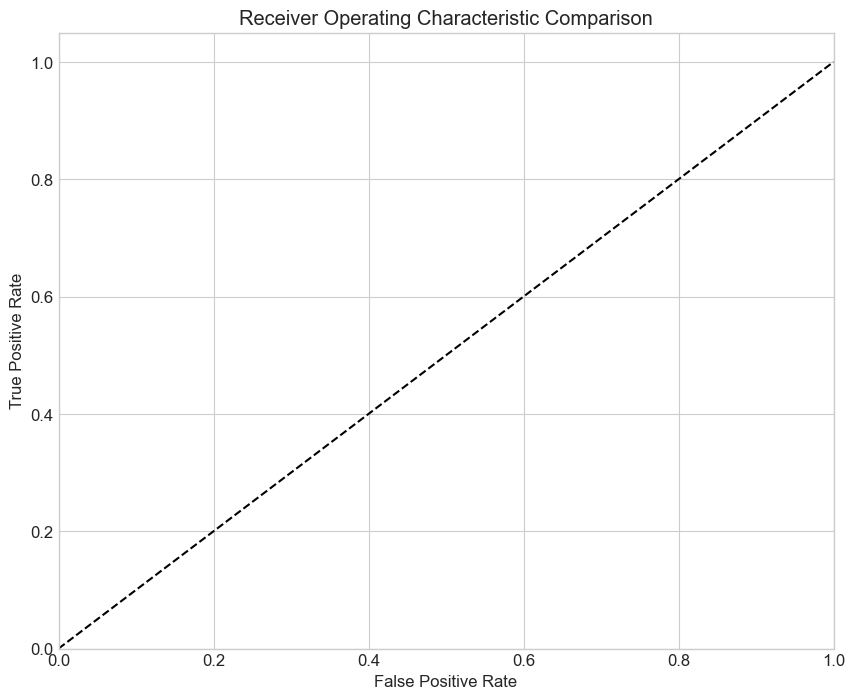


=== Pipeline Completed ===

Completed with warnings/errors (see above messages)


In [ ]:
import os
import numpy as np
from tqdm import tqdm
import mne
import gc
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy.signal import welch
import pywt
import pandas as pd
from matplotlib.gridspec import GridSpec
import re
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FormatStrFormatter
from entropy import sample_entropy, spectral_entropy

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")
sns.set_palette("colorblind")

class EEGPipeline:
    def __init__(self):
        self.models = {}
        self.results = {}
        self.scaler = None
        self.label_encoder = None
        self.common_channels = None
        self.feature_names = [
            'Delta Power', 'Theta Power', 'Alpha Power', 'Beta Power', 'Gamma Power',
            'Wavelet Mean 1', 'Wavelet Mean 2', 'Wavelet Mean 3', 'Wavelet Mean 4', 'Wavelet Mean 5',
            'Mean', 'Std Dev', 'Median'
        ]
        self.band_names = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
        self.channel_mapping = {}
        self.expected_features_per_channel = 13
        self._error_messages = []  

    def set_channel_mapping(self, mapping_dict):
        self.channel_mapping = mapping_dict

    def normalize_channel_name(self, channel_name):
        if isinstance(channel_name, (list, np.ndarray)):
            channel_name = channel_name[0]
        channel_name = str(channel_name).strip().upper()
        
        if channel_name in self.channel_mapping:
            return self.channel_mapping[channel_name]
        
        channel_name = re.sub(r'[^A-Z0-9]', '', channel_name)
        channel_name = re.sub(r'^CH', '', channel_name)
        channel_name = re.sub(r'^EEG', '', channel_name)
        channel_name = channel_name.lstrip('0')
        
        variations = {
            'FP1': 'Fp1', 'FP2': 'Fp2',
            'T3': 'T7', 'T4': 'T8',
            'T5': 'P7', 'T6': 'P8'
        }
        return variations.get(channel_name, channel_name)

    def get_channel_names_from_mat(self, mat_path):
        try:
            mat_data = loadmat(mat_path)
            channels = []
            
            if 'data' in mat_data:
                data_struct = mat_data['data'][0][0]
                if 'channels' in data_struct.dtype.names:
                    channels = [str(ch[0]) for ch in data_struct['channels'][0]]
                elif 'chanlocs' in data_struct.dtype.names:
                    chanlocs = data_struct['chanlocs'][0]
                    channels = [str(chan['labels'][0]) for chan in chanlocs]
            
            elif 'EEG' in mat_data:
                eeg_struct = mat_data['EEG'][0][0]
                if 'chanlocs' in eeg_struct.dtype.names:
                    chanlocs = eeg_struct['chanlocs'][0]
                    channels = [str(chan['labels'][0]) for chan in chanlocs]
                elif 'chaninfo' in eeg_struct.dtype.names:
                    chaninfo = eeg_struct['chaninfo'][0][0]
                    if 'labels' in chaninfo.dtype.names:
                        channels = [str(ch[0]) for ch in chaninfo['labels'][0]]
            
            elif 'X' in mat_data and 'ch_names' in mat_data:
                channels = [str(ch[0]) for ch in mat_data['ch_names'][0]]
                
            return [self.normalize_channel_name(ch) for ch in channels if ch and str(ch).strip()]
        except Exception as e:
            error_msg = f"Error loading {mat_path}: {str(e)}"
            self._error_messages.append(error_msg)
            print(error_msg)
            return []

    def get_channel_names_from_vhdr(self, vhdr_path):
        try:
            raw = mne.io.read_raw_brainvision(vhdr_path, preload=False, verbose=False)
            return [self.normalize_channel_name(ch) for ch in raw.ch_names]
        except Exception as e:
            error_msg = f"Error loading {vhdr_path}: {str(e)}"
            self._error_messages.append(error_msg)
            print(error_msg)
            return []

    def find_common_channels(self, healthy_channels, patient_channels):
        common = set(healthy_channels).intersection(patient_channels)
        
        if not common:
            healthy_set = set(healthy_channels)
            patient_set = set(patient_channels)
            common = healthy_set.intersection(patient_set)
            
        if not common:
            common_partial = set()
            for h_ch in healthy_set:
                for p_ch in patient_set:
                    if h_ch in p_ch or p_ch in h_ch:
                        common_partial.add(h_ch)
            if common_partial:
                print(f"Using partial channel matches: {common_partial}")
                return sorted(common_partial)
            
        print(f"Found {len(common)} common channels")
        return sorted(common)

    def collect_channel_names(self, folder_path, is_patient=False):
        all_channels = set()
        files = [f for f in os.listdir(folder_path) if f.endswith('.vhdr' if not is_patient else '.mat')]
        
        if not files:
            raise FileNotFoundError(f"No valid files found in {folder_path}")
            
        for file in tqdm(files, desc=f"Collecting {'patient' if is_patient else 'healthy'} channels"):
            file_path = os.path.join(folder_path, file)
            channels = self.get_channel_names_from_mat(file_path) if is_patient else self.get_channel_names_from_vhdr(file_path)
            
            if not channels:
                print(f"Warning: No channels found in {file}")
                continue
                
            all_channels.update(channels)
            
        if not all_channels:
            raise ValueError(f"No channels collected from {folder_path}")
            
        return sorted(all_channels)

    def load_dataset(self, folder_path, is_patient=False, max_files=None, max_duration=None):
        files = [f for f in os.listdir(folder_path) if f.endswith('.mat' if is_patient else '.vhdr')]
        loader_func = self.load_mat_data if is_patient else self.load_brainvision_data
            
        if not files:
            raise FileNotFoundError(f"No valid files found in {folder_path}")
            
        if max_files:
            files = files[:max_files]
            
        all_data = []
        all_labels = []
        sfreqs = []
        loaded_files = 0
        
        for file in tqdm(files, desc=f"Loading {'patient' if is_patient else 'healthy'} files"):
            file_path = os.path.join(folder_path, file)
            try:
                data, labels, sfreq = loader_func(file_path, max_duration)
                
                if len(data) > 0 and len(labels) > 0:
                    all_data.append(data)
                    all_labels.append(labels)
                    sfreqs.append(sfreq)
                    loaded_files += 1
                else:
                    print(f"Skipping {file} - no valid data")
            except Exception as e:
                error_msg = f"Error loading {file}: {str(e)}"
                self._error_messages.append(error_msg)
                print(error_msg)
                
            gc.collect()
            
        print(f"\nSuccessfully loaded {loaded_files}/{len(files)} files")
        
        if not all_data:
            raise ValueError("No valid data loaded - check file formats")
            
        avg_sfreq = np.mean(sfreqs) if sfreqs else (100 if is_patient else 250)
        return np.concatenate(all_data), np.concatenate(all_labels), avg_sfreq

    def load_brainvision_data(self, vhdr_path, max_duration=None):
        try:
            raw = mne.io.read_raw_brainvision(vhdr_path, preload=True, verbose=False)
            
            if max_duration:
                crop_end = min(max_duration, raw.times[-1])
                raw.crop(tmax=crop_end)
                
            data = raw.get_data().T.astype(np.float32)
            events, _ = mne.events_from_annotations(raw)
            labels = events[:, 2] if len(events) > 0 else np.zeros(len(data))
            
            return data, labels, raw.info['sfreq']
        except Exception as e:
            error_msg = f"Error loading {vhdr_path}: {str(e)}"
            self._error_messages.append(error_msg)
            print(error_msg)
            return np.array([]), np.array([]), None

    def load_mat_data(self, mat_path, max_duration=None, default_sfreq=100):
        try:
            mat_data = loadmat(mat_path)
            eeg_data = None
            labels = None
            sfreq = default_sfreq
            
            if 'data' in mat_data:
                data_struct = mat_data['data'][0][0]
                if 'X' in data_struct.dtype.names:
                    eeg_data = data_struct['X']
                    if eeg_data.ndim > 2:
                        eeg_data = eeg_data.reshape(eeg_data.shape[0], -1)
                    if 'y' in data_struct.dtype.names:
                        labels = data_struct['y'].flatten()
                    if 'sfreq' in data_struct.dtype.names:
                        sfreq = float(data_struct['sfreq'][0][0])
                    elif 'Fs' in data_struct.dtype.names:
                        sfreq = float(data_struct['Fs'][0][0])
            
            elif 'EEG' in mat_data:
                eeg_struct = mat_data['EEG'][0][0]
                if 'data' in eeg_struct.dtype.names:
                    eeg_data = eeg_struct['data'].T
                if 'event' in eeg_struct.dtype.names:
                    events = eeg_struct['event'][0]
                    labels = np.array([ev[0]['type'][0] for ev in events])
                if 'srate' in eeg_struct.dtype.names:
                    sfreq = float(eeg_struct['srate'][0][0])
            
            elif 'X' in mat_data:
                eeg_data = mat_data['X']
                if 'y' in mat_data:
                    labels = mat_data['y'].flatten()
            
            if labels is None or len(np.unique(labels)) <= 1:
                labels = np.zeros(len(eeg_data)) if eeg_data is not None else np.array([])
            
            if eeg_data is None:
                raise ValueError("No EEG data found in MAT file")
            
            min_len = min(len(eeg_data), len(labels))
            eeg_data = eeg_data[:min_len]
            labels = labels[:min_len]
            
            if max_duration:
                max_samples = int(max_duration * sfreq)
                eeg_data = eeg_data[:max_samples]
                labels = labels[:max_samples]
                
            return eeg_data.astype(np.float32), labels, sfreq
        except Exception as e:
            error_msg = f"Error loading {mat_path}: {str(e)}"
            self._error_messages.append(error_msg)
            print(error_msg)
            return np.array([]), np.array([]), None

    def preprocess_data(self, data, labels, sfreq=250, common_channels=None):
        try:
            n_channels = data.shape[1]
            ch_names = common_channels[:n_channels] if common_channels and len(common_channels) >= n_channels else [f'ch{i}' for i in range(n_channels)]
            
            info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
            raw = mne.io.RawArray(data.T, info)
            raw.filter(0.5, 40, fir_design='firwin',phase='zero-double')
            raw.notch_filter([50,60])
            events = mne.make_fixed_length_events(raw, duration=1.0)
            epochs = mne.Epochs(raw, events, tmin=0, tmax=1.0, baseline=None, preload=True)
            epochs_data = epochs.get_data()
            
            def extract_features(epoch_data):
                features = []
                for epoch in epoch_data:
                    epoch_features = []
                    for channel in epoch:
                        freqs, psd = welch(channel, fs=sfreq, nperseg=min(256, len(channel)))
                        bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 12),
                                'beta': (12, 30), 'gamma': (30, 50)}
                        band_powers = [np.sum(psd[(freqs >= low) & (freqs <= high)]) 
                                     for low, high in bands.values()]
                        
                        coeffs = pywt.wavedec(channel, 'db4', level=4)
                        wavelet_features = [np.mean(c) for c in coeffs[:5]]
                        if len(wavelet_features) < 5:
                            wavelet_features += [0.0] * (5 - len(wavelet_features))
                        
                        stats = [np.mean(channel), np.std(channel), np.median(channel)]
                        epoch_features.extend(band_powers + wavelet_features + stats)
                    features.append(epoch_features)
                return np.array(features)
                
            X = extract_features(epochs_data)
            y = labels[:len(X)]
            
            expected_features = n_channels * self.expected_features_per_channel
            if X.shape[1] != expected_features:
                if X.shape[1] < expected_features:
                    pad_width = ((0, 0), (0, expected_features - X.shape[1]))
                    X = np.pad(X, pad_width, mode='constant')
                else:
                    X = X[:, :expected_features]
                    
            return X, y
        except Exception as e:
            error_msg = f"Error during preprocessing: {e}"
            self._error_messages.append(error_msg)
            print(error_msg)
            return None, None

    def load_preprocessing_artifacts(self, scaler_path, label_encoder_path):
        try:
            self.scaler = joblib.load(scaler_path)
            print(f"✓ Scaler loaded successfully (expecting {self.scaler.n_features_in_} features)")
        except Exception as e:
            error_msg = f"✗ Failed to load scaler: {str(e)}"
            self._error_messages.append(error_msg)
            print(error_msg)
            self.scaler = None
            
        try:
            self.label_encoder = joblib.load(label_encoder_path)
            print("✓ Label encoder loaded successfully")
        except Exception as e:
            error_msg = f"✗ Failed to load label encoder: {str(e)}"
            self._error_messages.append(error_msg)
            print(error_msg)
            self.label_encoder = None

    def match_features(self, X, expected_features):
        if X.shape[1] == expected_features:
            return X
        elif X.shape[1] < expected_features:
            pad_width = ((0, 0), (0, expected_features - X.shape[1]))
            return np.pad(X, pad_width, mode='constant')
        else:
            return X[:, :expected_features]

    def load_models(self, model_paths):
        self.models = {}
        for name, path in model_paths.items():
            try:
                self.models[name] = joblib.load(path)
                print(f"✓ {name} model loaded successfully")
            except Exception as e:
                error_msg = f"✗ Failed to load {name} model: {str(e)}"
                self._error_messages.append(error_msg)
                print(error_msg)
                
        if not self.models:
            raise ValueError("No models were loaded successfully")
        return self.models

    def evaluate_models(self, X_data, y_data, data_type='Patient'):
        self.results[data_type] = {}
        for name, model in self.models.items():
            try:
                y_pred = model.predict(X_data)
                
                if len(np.unique(y_data)) > 2:
                    acc = accuracy_score(y_data, y_pred)
                    report = classification_report(y_data, y_pred, output_dict=True, zero_division=0)
                    cm = confusion_matrix(y_data, y_pred)
                    roc_auc = None
                else:
                    y_proba = model.predict_proba(X_data)[:, 1] if hasattr(model, "predict_proba") else None
                    acc = accuracy_score(y_data, y_pred)
                    report = classification_report(y_data, y_pred, output_dict=True, zero_division=0)
                    cm = confusion_matrix(y_data, y_pred)
                    if y_proba is not None:
                        fpr, tpr, _ = roc_curve(y_data, y_proba)
                        roc_auc = auc(fpr, tpr)
                    else:
                        roc_auc = None
                
                self.results[data_type][name] = {
                    'accuracy': acc,
                    'report': report,
                    'confusion_matrix': cm,
                    'roc_auc': roc_auc,
                    'fpr': fpr if 'fpr' in locals() else None,
                    'tpr': tpr if 'tpr' in locals() else None,
                    'y_true': y_data,
                    'y_pred': y_pred
                }
            except Exception as e:
                error_msg = f"Error evaluating {name} on {data_type} data: {str(e)}"
                self._error_messages.append(error_msg)
                print(error_msg)

    def plot_eeg_comparison(self, healthy_data, patient_data, healthy_sfreq=250, patient_sfreq=100, samples=500, channels=3):
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
        
        time_h = np.arange(min(samples, len(healthy_data))) / healthy_sfreq
        time_p = np.arange(min(samples, len(patient_data))) / patient_sfreq
        
        for ch in range(min(channels, healthy_data.shape[1])):
            ax1.plot(time_h, healthy_data[:len(time_h), ch] * 1e6,
                    linewidth=2, alpha=0.8, label=f'Channel {ch+1}')
        
        ax1.set_title('Healthy EEG Signals', fontsize=16, pad=20)
        ax1.set_xlabel('Time (seconds)', fontsize=14)
        ax1.set_ylabel('Amplitude (μV)', fontsize=14)
        ax1.legend(loc='upper right', fontsize=12)
        ax1.grid(True, linestyle='--', alpha=0.6)
        ax1.set_ylim(-100, 100)
        ax1.tick_params(axis='both', which='major', labelsize=12)
        
        for ch in range(min(channels, patient_data.shape[1])):
            ax2.plot(time_p, patient_data[:len(time_p), ch] * 1e6,
                    linewidth=2, alpha=0.8, label=f'Channel {ch+1}')
        
        ax2.set_title('Patient EEG Signals', fontsize=16, pad=20)
        ax2.set_xlabel('Time (seconds)', fontsize=14)
        ax2.legend(loc='upper right', fontsize=12)
        ax2.grid(True, linestyle='--', alpha=0.6)
        ax2.set_ylim(-100, 100)
        ax2.tick_params(axis='both', which='major', labelsize=12)
        
        plt.suptitle('EEG Signal Comparison (First 500 Samples)', fontsize=18, y=1.02)
        plt.tight_layout()
        plt.show()

    def plot_patient_response_categories(self):
        if not self.results or 'Patient' not in self.results:
            print("No patient results available for visualization")
            return
    
        try:
            model_name = next(iter(self.results['Patient']))
            results = self.results['Patient'][model_name]
            
            if 'y_true' not in results or 'y_pred' not in results:
                print("Missing required data in results")
                return
                
            y_true = results['y_true']
            y_pred = results['y_pred']
            
            if len(np.unique(y_true)) == 2:
                accuracies = (y_pred == y_true).astype(float)
            else:
                accuracies = np.array([1.0 if pred == true else 0.0 
                                     for pred, true in zip(y_pred, y_true)])
            
            categories = []
            for acc in accuracies:
                if acc >= 0.7:
                    categories.append("Good Response")
                elif 0.4 <= acc < 0.7:
                    categories.append("Medium Response")
                else:
                    categories.append("Poor Response")
            
            category_counts = pd.Series(categories).value_counts()
            
            fig = plt.figure(figsize=(18, 8))
            gs = GridSpec(1, 2, width_ratios=[1, 1.5])
            
            ax1 = fig.add_subplot(gs[0])
            colors = ['#4CAF50', '#FFC107', '#F44336']
            
            explode = (0.05, 0.05, 0.05)[:len(category_counts)]
            
            if len(category_counts) < 3:
                colors = colors[:len(category_counts)]
                explode = explode[:len(category_counts)]
            
            wedges, texts, autotexts = ax1.pie(
                category_counts, 
                labels=category_counts.index, 
                autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
                startangle=90, 
                colors=colors,
                explode=explode,
                textprops={'fontsize': 12}
            )
            
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
            
            ax1.set_title('Patient Response Distribution', fontsize=16, pad=20)
            
            ax2 = fig.add_subplot(gs[1])
            barplot = sns.barplot(
                x=category_counts.index, 
                y=category_counts.values, 
                ax=ax2,
                palette=colors,
                saturation=0.8
            )
            
            ax2.set_title('Patient Response Categories', fontsize=16, pad=20)
            ax2.set_xlabel('Response Category', fontsize=14)
            ax2.set_ylabel('Number of Patients', fontsize=14)
            
            for p in barplot.patches:
                height = p.get_height()
                if not np.isnan(height) and height > 0:
                    barplot.annotate(
                        f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 10),
                        textcoords='offset points',
                        fontsize=12,
                        fontweight='bold'
                    )
            
            if 'accuracy' in results:
                overall_acc = results['accuracy']
                fig.text(
                    0.5, -0.05,
                    f'Model: {model_name} | Overall Accuracy: {overall_acc:.1%}',
                    ha='center', va='center', fontsize=14
                )
            
            plt.suptitle('Patient Response Categorization', fontsize=18, y=1.05)
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Error generating patient response visualization: {str(e)}")
            import traceback
            traceback.print_exc()

    def plot_confusion_matrices(self, data_type='Patient'):
        if not self.results or data_type not in self.results:
            print(f"No results available for {data_type} data")
            return
            
        try:
            models = list(self.results[data_type].keys())
            num_models = len(models)
            
            if num_models == 0:
                print("No models available for visualization")
                return
                
            fig, axes = plt.subplots(1, num_models, figsize=(6*num_models, 5))
            if num_models == 1:
                axes = [axes]
            
            for i, model_name in enumerate(models):
                model_results = self.results[data_type][model_name]
                
                if 'confusion_matrix' not in model_results:
                    print(f"No confusion matrix for {model_name}")
                    continue
                    
                cm = model_results['confusion_matrix']
                
                if self.label_encoder:
                    classes = self.label_encoder.classes_
                else:
                    n_classes = cm.shape[0]
                    classes = [f'Class {i}' for i in range(n_classes)]
                    if n_classes == 2:
                        classes = ['Negative', 'Positive']
                
                cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
                
                sns.heatmap(
                    cm_normalized, 
                    annot=True, 
                    fmt='.2f',
                    cmap='Blues',
                    xticklabels=classes,
                    yticklabels=classes,
                    ax=axes[i],
                    cbar=False,
                    annot_kws={'fontsize': 10},
                    vmin=0, vmax=1
                )
                
                axes[i].set_title(f'{model_name}\nConfusion Matrix', fontsize=14)
                axes[i].set_xlabel('Predicted Label', fontsize=12)
                axes[i].set_ylabel('True Label', fontsize=12)
            
            plt.suptitle(f'Model Performance on {data_type} Data', fontsize=16, y=1.05)
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Error generating confusion matrices: {str(e)}")
            import traceback
            traceback.print_exc()
            
    def plot_roc_curves_comparison(self):
        if not self.results or 'Patient' not in self.results:
            print("No patient results available")
            return
        
        plt.figure(figsize=(10, 8))
        
        for model_name, results in self.results['Patient'].items():
            if results.get('roc_auc') is not None:
                plt.plot(results['fpr'], results['tpr'],
                        label=f'{model_name} (AUC = {results["roc_auc"]:.2f})')
        
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic Comparison')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()
        
    def plot_model_performance_comparison(self):
        if not self.results or 'Patient' not in self.results:
            raise ValueError("Patient results not available")
            
        models = list(self.results['Patient'].keys())
        metrics = ['accuracy', 'precision', 'recall', 'f1-score']
        
        metrics_data = []
        for model in models:
            report = self.results['Patient'][model]['report']
            if isinstance(report, dict) and 'accuracy' in report:
                if 'macro avg' in report:
                    metrics_data.append({
                        'Model': model,
                        'Accuracy': report['accuracy'],
                        'Precision': report['macro avg']['precision'],
                        'Recall': report['macro avg']['recall'],
                        'F1-Score': report['macro avg']['f1-score']
                    })
                elif len(report.keys()) > 3:
                    metrics_data.append({
                        'Model': model,
                        'Accuracy': report['accuracy'],
                        'Precision': report['1']['precision'],
                        'Recall': report['1']['recall'],
                        'F1-Score': report['1']['f1-score']
                    })
        
        if not metrics_data:
            raise ValueError("No valid metric data found")
            
        df = pd.DataFrame(metrics_data)
        df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')
        
        plt.figure(figsize=(12, 6))
        barplot = sns.barplot(
            x='Model', 
            y='Score', 
            hue='Metric', 
            data=df_melted,
            palette='viridis',
            alpha=0.8
        )
        
        plt.title('Model Performance Metrics Comparison', fontsize=16, pad=20)
        plt.xlabel('Model', fontsize=14)
        plt.ylabel('Score', fontsize=14)
        plt.ylim(0, 1.1)
        plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        for p in barplot.patches:
            barplot.annotate(
                format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10
            )
        
        plt.tight_layout()
        plt.show()

    def _get_error_messages(self):
        return self._error_messages

    def run_pipeline(self, config):
        results = None
        try:
            print("\n=== EEG Analysis Pipeline ===\n")
            
            print("[1/7] Loading data...")
            healthy_data, healthy_labels, h_sfreq = self.load_dataset(
                config['healthy_path'],
                max_files=config.get('max_files'),
                max_duration=config.get('max_duration', None))
            patient_data, patient_labels, p_sfreq = self.load_dataset(
                config['patient_path'],
                is_patient=True,
                max_files=config.get('max_files'),
                max_duration=config.get('max_duration', None))
            
            print("[2/7] Finding common channels...")
            if not config.get('skip_channel_matching', False):
                healthy_channels = self.collect_channel_names(config['healthy_path'])
                patient_channels = self.collect_channel_names(config['patient_path'], is_patient=True)
                self.common_channels = self.find_common_channels(healthy_channels, patient_channels)
            
            print("[3/7] Preprocessing data...")
            X_healthy, y_healthy = self.preprocess_data(
                healthy_data, healthy_labels,
                sfreq=h_sfreq,
                common_channels=self.common_channels)
            X_patients, y_patients = self.preprocess_data(
                patient_data, patient_labels,
                sfreq=p_sfreq,
                common_channels=self.common_channels)
            
            print("[4/7] Loading preprocessing artifacts...")
            self.load_preprocessing_artifacts(
                config['scaler_path'],
                config['label_encoder_path'])
            
            print("[5/7] Applying transformations...")
            if self.scaler:
                expected_features = self.scaler.n_features_in_
                X_healthy = self.match_features(X_healthy, expected_features)
                X_patients = self.match_features(X_patients, expected_features)
                X_healthy = self.scaler.transform(X_healthy)
                X_patients = self.scaler.transform(X_patients)
            
            if self.label_encoder:
                y_patients = self.label_encoder.transform(y_patients)
            
            print("[6/7] Loading models...")
            self.load_models(config['model_paths'])
            
            print("[7/7] Evaluating models...")
            self.evaluate_models(X_patients, y_patients, data_type='Patient')
            
            print("\n=== Generating Visualizations ===\n")
            try:
                plt.style.use('seaborn-v0_8-whitegrid')
            except:
                plt.style.use('ggplot')
            
            vis_funcs = [
                ('EEG Comparison', self.plot_eeg_comparison, [healthy_data, patient_data, h_sfreq, p_sfreq]),
                ('Patient Response', self.plot_patient_response_categories, []),
                ('Confusion Matrix', self.plot_confusion_matrices, ['Patient']),
                ('Model Performance', self.plot_model_performance_comparison, []),
                ('ROC Curve' , self.plot_roc_curves_comparison,[])
            ]
            
            for name, func, args in vis_funcs:
                try:
                    print(f"Generating {name} visualization...")
                    func(*args)
                    plt.close('all')
                except Exception as e:
                    error_msg = f"Failed to generate {name}: {str(e)}"
                    self._error_messages.append(error_msg)
                    print(error_msg)
            
            print("\n=== Pipeline Completed ===\n")
            if self._error_messages:
                print("Completed with warnings/errors (see above messages)")
            else:
                print("Completed successfully!")
            
            results = {
                'healthy_data': (X_healthy, y_healthy),
                'patient_data': (X_patients, y_patients),
                'results': self.results,
                'metadata': {
                    'healthy_samples': len(X_healthy),
                    'patient_samples': len(X_patients),
                    'common_channels': self.common_channels,
                    'features_per_channel': self.expected_features_per_channel,
                    'errors': self._error_messages
                }
            }
            
        except Exception as e:
            print(f"\n!!! Pipeline Failed !!!\nError: {str(e)}")
            import traceback
            traceback.print_exc()
            
        finally:
            if 'healthy_data' in locals():
                del healthy_data
            if 'patient_data' in locals():
                del patient_data
            gc.collect()
            
        return results


if __name__ == "__main__":
    channel_mapping = {
        'FP1': 'Fp1',
        'FP2': 'Fp2',
        'F3': 'F3',
        'F4': 'F4',
    }

    config = {
        'healthy_path': "F:/shivani/VSCode/ml/worked on dataset/3(final)/Healthy",
        'patient_path': "F:/shivani/VSCode/ml/worked on dataset/4/dataset/Patients",
        'model_paths': {
            "SVM": "F:/shivani/VSCode/ml/worked on dataset/3(final)/svm_model.pkl",
            "RF": "F:/shivani/VSCode/ml/worked on dataset/3(final)/rf_model.pkl",
            "XGB": "F:/shivani/VSCode/ml/worked on dataset/3(final)/xgb_model.pkl"
        },
        'scaler_path': "F:/shivani/VSCode/ml/worked on dataset/3(final)/preprocessing_artifacts/eeg_scaler.joblib",
        'label_encoder_path': "F:/shivani/VSCode/ml/worked on dataset/3(final)/preprocessing_artifacts/label_encoder.joblib",
        'max_files': 5,
    }

    pipeline = EEGPipeline()
    pipeline.set_channel_mapping(channel_mapping)
    results = pipeline.run_pipeline(config)